<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [162]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [163]:
# Read CSV
house_csv = "../../DATA/Sacramento_transactions.csv"
df = pd.read_csv(house_csv)


In [217]:
#replacing 0 with mean in sq__ft feature
df['sq__ft'].replace({0: np.nan}, inplace=True)
sqft_mean = np.mean(df['sq__ft'])
df['sq__ft'].replace({np.nan: sqft_mean}, inplace=True)

In [51]:
df.shape

(985, 12)

In [15]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [50]:
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [55]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [53]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [70]:
print('price:', df['price'].min(), 'to', df['price'].max())
print('beds:', df['beds'].min(), 'to', df['beds'].max())
print('baths:', df['baths'].min(), 'to', df['baths'].max())
print('sq__ft:', df['sq__ft'].min(), 'to', df['sq__ft'].max())

price: 1551 to 884790
beds: 0 to 8
baths: 0 to 5
sq__ft: 0 to 5822


In [85]:
df_min, df_max = (min(df.min(numeric_only=True)), 
                        max(df.max(numeric_only=True)))
df_min, df_max

(-121.551704, 884790.0)

In [84]:
print(df['type'].unique())

['Residential' 'Condo' 'Multi-Family' 'Unkown']


In [87]:
def check_min_max(df):
    # Check min, max of each column
    print(df.describe().T[['min', 'max']])

check_min_max(df)

                    min            max
zip        95603.000000   95864.000000
beds           0.000000       8.000000
baths          0.000000       5.000000
sq__ft         0.000000    5822.000000
price       1551.000000  884790.000000
latitude      38.241514      39.020808
longitude   -121.551704    -120.597599


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [5]:
# ANSWER
It is the output of out model, the Y value which is the price prediction.


'../DATA/Sacramentorealestatetransactions.csv'

#### 2.2 List all possible variables which might be Predictor variable.

In [90]:
# ANSWER
All but sale date  price and zipcode

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

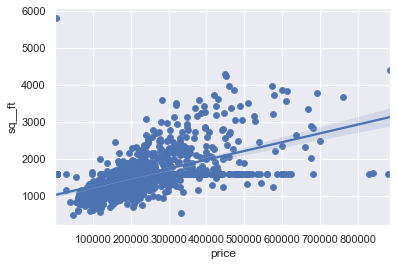

In [308]:
# ANSWER
sns.scatterplot(df['price'], df['sq__ft'])
g = sns.regplot(x='price', y='sq__ft', data=df)


#### 2.3 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [309]:
# ANSWER
y = mx + b best fit line will show us the trend of the data
using corolation

SyntaxError: invalid syntax (<ipython-input-309-d87bf471ae49>, line 2)

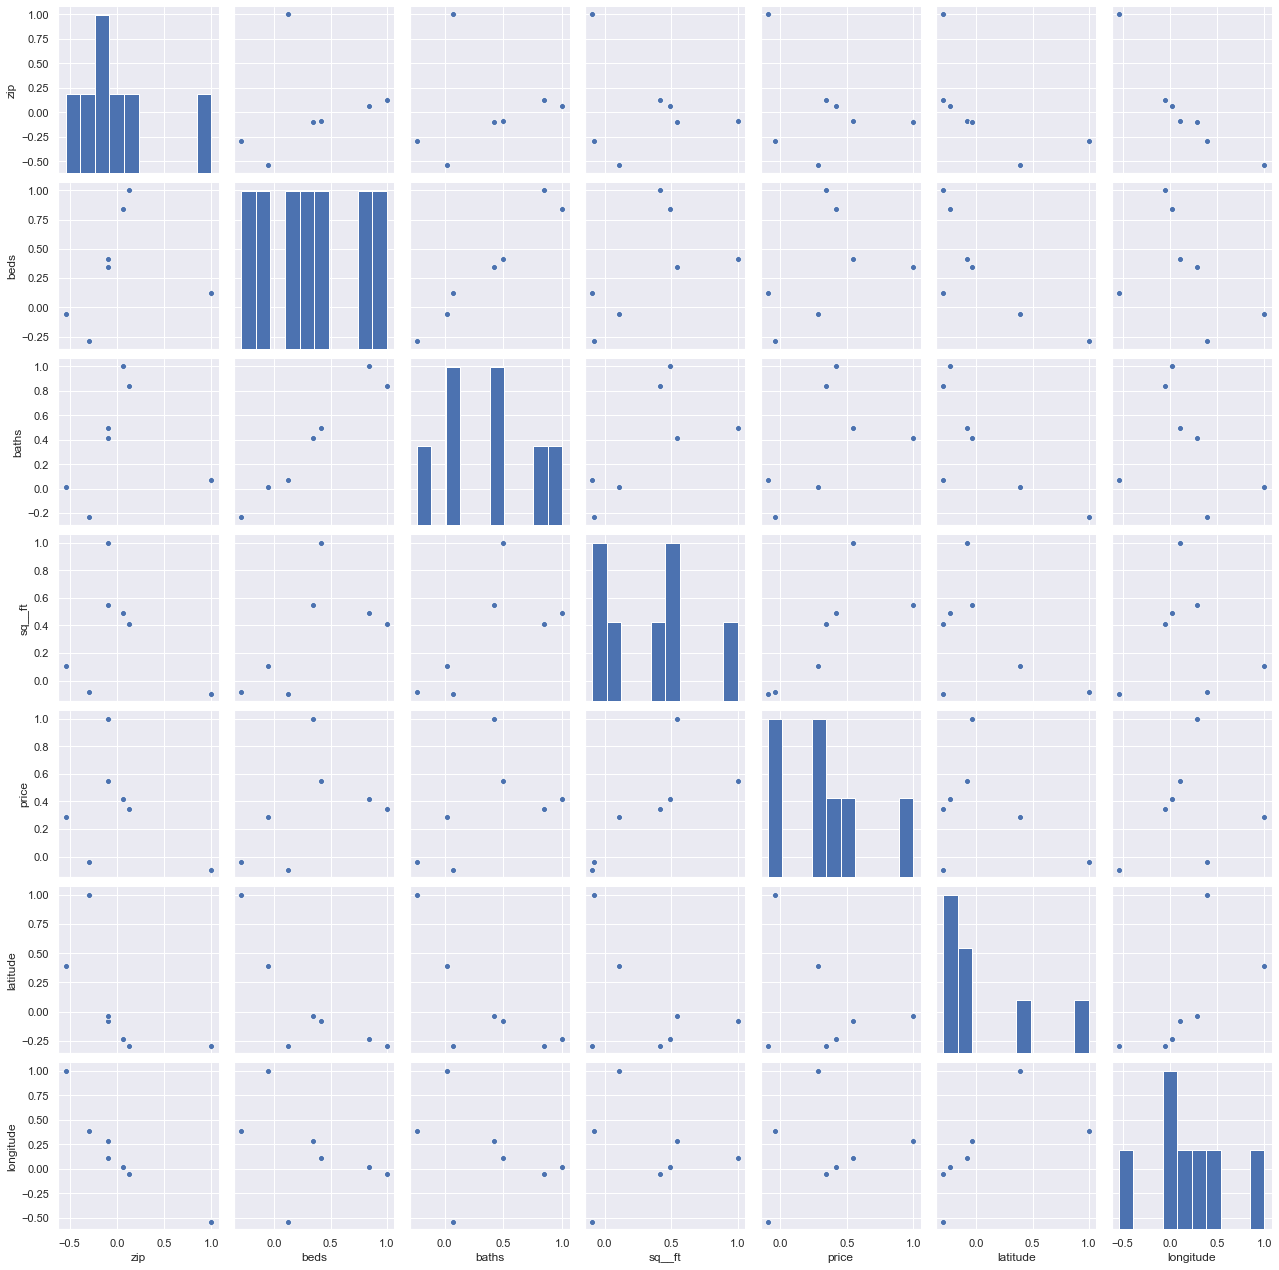

In [310]:
sns.pairplot(df.corr())


#### 2. 4 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [167]:
# ANSWER


#### 2.5  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.5 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [321]:
# ANSWER
X = np.array(df['sq__ft'])
y = np.array(df['price'])

In [385]:
np.mean(X)

1591.1461916461917

##### 2.5.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [322]:
# ANSWER

Beta1 = sum((y - np.mean(y)) * (X - np.mean(X))) / sum((X - np.mean(X))**2)
Beta1

125.21648667984466

##### 2.5.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [323]:
# ANSWER
Beta0 = np.mean(y) - (Beta1 * np.mean(X))
Beta0 

34906.52804743993

##### 2.4.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [390]:
# ANSWER
y_hat = Beta0 + Beta1 * X

##### 2.5.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [325]:
# ANSWER
residual_i = sum(y) - sum(y_hat)
residual_i

1.043081283569336e-06

##### 2.5.D Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [326]:
SS_res = sum((y - y_hat)**2)
SS_tot = sum((y - np.mean(y))** 2)
R_Square = 1 - (SS_res / SS_tot)
R_Square

0.2981879390297666

In [318]:
# ANSWER
import matplotlib.pyplot as plt
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
print("slope: %f    intercept: %f      R-squared:%f" % (slope, intercept, R_Square))

slope: 1.000000    intercept: 0.000000      R-squared:-164111.510387


##### 2.5.G [BONUS] Draw Plot of Predicted Line

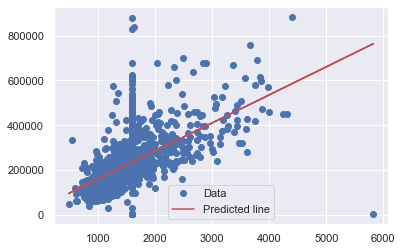

In [384]:
# ANSWER
plt.plot(X, y, 'o', label='Data')
plt.plot(X, Beta0 + Beta1*X, 'r', label='Predicted line')
plt.legend()
plt.show()

##### 2.5.G [BONUS] Draw Plot of Predicted Line With Resudals

In [379]:
# ANSWER
#sns.residplot(x='price', y='sq__ft', data=df)


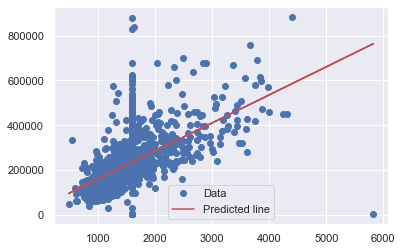

In [361]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(X, y, 'o', label='Data')
plt.plot(X, Beta0 + Beta1*X, 'r', label='Predicted line')
plt.legend()




plt.show()

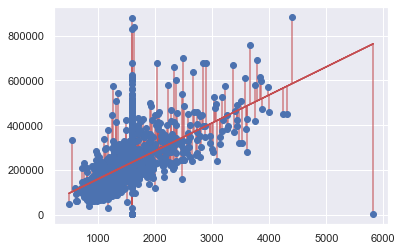

In [382]:
import matplotlib.pyplot as plt
import numpy as np



fig, ax = plt.subplots()


plt.plot(X, y, 'o', label='Data')
plt.plot(X, Beta0 + Beta1*X, 'r', label='Predicted line')
ax.vlines(X,y,y_hat,color='r', alpha=0.7)

plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [380]:
# ANSWER
Beta0 + Beta1*1204

185667.1780099729



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



